# `auto_arima` benchmarks

This notebook benchmarks the `auto_arima` function with various hyperparametric combinations. All of the benchmarks are used with the `wineind` data found in `pmdarima.datasets.load_wineind`.

In [8]:
import pmdarima
from pmdarima.datasets import load_wineind

wineind = load_wineind()
print("Pyramid version: %s" % pmdarima.__version__)

Pyramid version: 1.0.0-dev


In [9]:
import numpy as np
import gc
from datetime import datetime
import matplotlib.pyplot as plt
%matplotlib inline

# to store the results
stepwise_results = []
grid_results = []
mu_second = 0.0 + 10 ** 6 # number of microseconds in a second

In [10]:
def benchmark(x, results, **kwargs):
    from pmdarima.arima import auto_arima
    
    gc.collect()
    
    # start
    tstart = datetime.now()
    auto_arima(x, **kwargs)
    delta = datetime.now() - tstart
    # stop
    
    results.append(delta.seconds + delta.microseconds / mu_second)

/anaconda3/envs/pmdenv/lib/python3.6/site-packages/pmdarima/arima/auto.py:864: ModelFitWarning: Unable to fit ARIMA for order=(1, 1, 1) seasonal_order=(0, 0, 0, 1); data is likely non-stationary. (if you do not want to see these warnings, run with error_action="ignore")
  ModelFitWarning)
/anaconda3/envs/pmdenv/lib/python3.6/site-packages/pmdarima/arima/auto.py:864: ModelFitWarning: Unable to fit ARIMA for order=(1, 1, 1) seasonal_order=(0, 0, 0, 1); data is likely non-stationary. (if you do not want to see these warnings, run with error_action="ignore")
  ModelFitWarning)


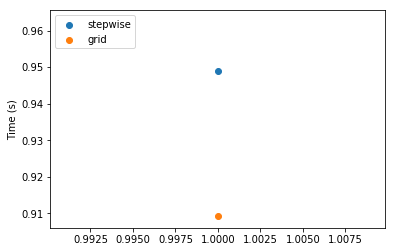

In [11]:
def fit_benchmark(**kwargs):
    # pop these, since we'll manually assign
    kwargs.pop('stepwise', None)
    kwargs.pop('n_jobs', None)
    
    for stepwise, results in ((True, stepwise_results), (False, grid_results)):
        benchmark(wineind, results, **kwargs)
        
def plot_benchmarks():
    plt.figure('auto_arima benchmark results')
    xx = len(stepwise_results)
    plt.scatter(x=xx, y=stepwise_results, label='stepwise')
    plt.scatter(x=xx, y=grid_results, label='grid')
    plt.legend(loc='upper left')
    plt.ylabel('Time (s)')
    plt.show()

# fit with all default args
fit_benchmark(suppress_warnings=True)
plot_benchmarks()